In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("samsung_unstructured_sales_dataset_50000.csv")

df.head()

,Order_ID,Product_Model,product_model_raw,Region,Country,Sales_Channel,Currency,Sales_Person,Warranty_Flag,Order_Date,...,Revenue,Profit,Customer_Segment,Delivery_Status,Campaign_Name,OS_Version,Customer_Location_Type,Network_Type,Customer_Rating,Customer_Feedback
0,1000,Galaxy S22,galaxy s22,Asia,USA,E-commerce,EUR,Rohit,NaN,2024-06-14 00:00:00,...,34507.96,3586.44,NaN,In Transit,HolidaySale,Android 13,Urban,5G,NaN,Late delivery
1,1001,Galaxy A14,galaxy s21,Africa,USA,Retail,EUR,Amit,N,2023-11-24 00:00:00,...,15925.68,2134.88,Medium,In Transit,HolidaySale,Android 14,Semi-Urban,5G,5.0,NaN
2,1002,Galaxy A34,galaxy z flip,North America,France,Distributor,INR,Rohit,NaN,12/11/2024,...,70738.87,10838.15,Medium,In Transit,HolidaySale,Android 14,Semi-Urban,5G,NaN,Damaged box
3,1003,Galaxy S21,galaxy s23,South America,UK,Online,EUR,Ali,NaN,02-03-2023,...,5538.24,1705.14,Medium,In Transit,NaN,Android 12,Semi-Urban,4G,NaN,Good service
4,1004,Galaxy Z Fold,galaxy s22,Africa,India,Online,USD,Ali,No,2024-05-14 00:00:00,...,21998.21,4862.69,NaN,Returned,Promo2,Android 14,Urban,4G,4.4,Excellent


In [3]:
# ✅ STEP-1 : Understand the structure (Audit)

In [4]:
df.shape

(50000, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                50000 non-null  int64  
 1   Product_Model           50000 non-null  object 
 2   product_model_raw       50000 non-null  object 
 3   Region                  50000 non-null  object 
 4   Country                 50000 non-null  object 
 5   Sales_Channel           50000 non-null  object 
 6   Currency                50000 non-null  object 
 7   Sales_Person            50000 non-null  object 
 8   Warranty_Flag           39988 non-null  object 
 9   Order_Date              50000 non-null  object 
 10  Unit_Price              50000 non-null  float64
 11  Unit_Cost               50000 non-null  float64
 12  Discount_%              50000 non-null  int64  
 13  Quantity                50000 non-null  int64  
 14  Revenue                 50000 non-null

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_ID,50000.0,NaN,NaN,NaN,25999.5,14433.901067,1000.0,13499.75,25999.5,38499.25,50999.0
Product_Model,50000,7,Galaxy S23,7225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_model_raw,50000,7,galaxy z flip,7241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,50000,5,Africa,10133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,50000,8,UK,6320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Channel,50000,4,Retail,12618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Currency,50000,3,INR,16806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Person,50000,7,Rohit,7262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Warranty_Flag,39988,4,Y,10175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_Date,50000,2163,2023-10-22 00:00:00,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# ✅ STEP-2 : Check missing values

In [8]:
df.isna().sum().sort_values(ascending=False)

Customer_Rating           25078
Campaign_Name             12599
Customer_Segment          12435
Customer_Feedback         10054
Warranty_Flag             10012
Order_ID                      0
product_model_raw             0
Product_Model                 0
Sales_Person                  0
Currency                      0
Sales_Channel                 0
Country                       0
Region                        0
Order_Date                    0
Unit_Price                    0
Unit_Cost                     0
Profit                        0
Revenue                       0
Quantity                      0
Discount_%                    0
OS_Version                    0
Delivery_Status               0
Network_Type                  0
Customer_Location_Type        0
dtype: int64

In [9]:
# ✅ STEP-3 : Fix empty strings (very important)

In [10]:
df.replace("", np.nan, inplace=True)

In [11]:
df.isna().sum()

Order_ID                      0
Product_Model                 0
product_model_raw             0
Region                        0
Country                       0
Sales_Channel                 0
Currency                      0
Sales_Person                  0
Warranty_Flag             10012
Order_Date                    0
Unit_Price                    0
Unit_Cost                     0
Discount_%                    0
Quantity                      0
Revenue                       0
Profit                        0
Customer_Segment          12435
Delivery_Status               0
Campaign_Name             12599
OS_Version                    0
Customer_Location_Type        0
Network_Type                  0
Customer_Rating           25078
Customer_Feedback         10054
dtype: int64

In [12]:
# ✅ STEP-4 : Standardize column names

In [13]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['order_id', 'product_model', 'product_model_raw', 'region', 'country',
       'sales_channel', 'currency', 'sales_person', 'warranty_flag',
       'order_date', 'unit_price', 'unit_cost', 'discount_%', 'quantity',
       'revenue', 'profit', 'customer_segment', 'delivery_status',
       'campaign_name', 'os_version', 'customer_location_type', 'network_type',
       'customer_rating', 'customer_feedback'],
      dtype='object')

In [14]:
# ✅ STEP-5 : Remove duplicate semantic column
# First clean product names.

In [15]:
df["product_model"] = df["product_model"].str.strip().str.title()

In [16]:
# Now drop dirty duplicate column:

In [17]:
df.drop(columns=["product_model_raw"], inplace=True)

In [18]:
# ✅ STEP-6 : Fix Warranty flag inconsistency (Yes / Y / No / N)

In [19]:
df["warranty_flag"] = (
    df["warranty_flag"]
      .replace({"Y": "Yes", "N": "No", "y": "Yes", "n": "No"})
)

In [20]:
df["warranty_flag"].value_counts(dropna=False)

warranty_flag
Yes    20185
No     19803
NaN    10012
Name: count, dtype: int64

In [21]:
# ✅ STEP-7 : Convert order_date (mixed formats)

In [22]:
df["order_date"] = pd.to_datetime(
    df["order_date"],
    errors="coerce",
    dayfirst=True
)

C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\2628500843.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["order_date"] = pd.to_datetime(


In [23]:
df["order_date"].isna().sum()

np.int64(33467)

In [24]:
# ✅ STEP-8 : Fix numeric columns

In [25]:
num_cols = [
    "unit_price","unit_cost","discount_%",
    "quantity","revenue","profit","customer_rating"
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [26]:
# ✅ STEP-9 : Validate revenue & profit (important professional step)

In [27]:
# Create recalculated revenue:
df["calculated_revenue"] = (
    df["unit_price"] * df["quantity"] * (1 - df["discount_%"] / 100)
)

In [30]:
# Revenue difference:
df["revenue_diff"] = df["revenue"] - df["calculated_revenue"]

In [31]:
# Check error distribution:
df["revenue_diff"].describe()

count    50000.000000
mean        -0.000071
std          0.002575
min         -0.005000
25%         -0.002000
50%          0.000000
75%          0.002000
max          0.005000
Name: revenue_diff, dtype: float64

In [32]:
# ✅ STEP-10 : Create profit margin feature (mandatory for business analysis)

In [33]:
df["profit_margin"] = df["profit"] / df["revenue"]

In [34]:
# ✅ STEP-11 : Standardize categorical columns

In [35]:
cat_cols = [
    "region","country","sales_channel","currency",
    "sales_person","customer_segment","delivery_status",
    "campaign_name","os_version",
    "customer_location_type","network_type"
]

for col in cat_cols:
    df[col] = df[col].str.strip().str.title()

In [36]:
# ✅ STEP-12 : Handle missing ratings

In [37]:
df["customer_rating"].fillna(df["customer_rating"].median(), inplace=True)

In [38]:
# ✅ STEP-13 : Create time features (for trend analysis)

In [39]:
df["order_year"] = df["order_date"].dt.year
df["order_month"] = df["order_date"].dt.month
df["order_month_name"] = df["order_date"].dt.month_name()

In [40]:
# ✅ STEP-14 : Currency issue (important)
df["currency"].value_counts()

currency
Inr    16806
Eur    16720
Usd    16474
Name: count, dtype: int64

In [41]:
# ✅ STEP-15 : Final dataset check

In [42]:
df.isna().sum()

order_id                      0
product_model                 0
region                        0
country                       0
sales_channel                 0
currency                      0
sales_person                  0
warranty_flag             10012
order_date                33467
unit_price                    0
unit_cost                     0
discount_%                    0
quantity                      0
revenue                       0
profit                        0
customer_segment          12435
delivery_status               0
campaign_name             12599
os_version                    0
customer_location_type        0
network_type                  0
customer_rating               0
customer_feedback         10054
calculated_revenue            0
revenue_diff                  0
profit_margin                 0
order_year                33467
order_month               33467
order_month_name          33467
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                50000 non-null  int64         
 1   product_model           50000 non-null  object        
 2   region                  50000 non-null  object        
 3   country                 50000 non-null  object        
 4   sales_channel           50000 non-null  object        
 5   currency                50000 non-null  object        
 6   sales_person            50000 non-null  object        
 7   warranty_flag           39988 non-null  object        
 8   order_date              16533 non-null  datetime64[ns]
 9   unit_price              50000 non-null  float64       
 10  unit_cost               50000 non-null  float64       
 11  discount_%              50000 non-null  int64         
 12  quantity                50000 non-null  int64 

In [44]:
# ✅ STEP-16 : Save cleaned version

In [46]:
clean_path = "samsung_sales_cleaned.csv"
df.to_csv(clean_path, index=False)

clean_path

'samsung_sales_cleaned.csv'

In [47]:
# ✅ Q1. Which product models generate the highest and lowest profit?

In [48]:
import pandas as pd

# Load cleaned data
df = pd.read_csv("samsung_sales_cleaned.csv")

# Group by product model and calculate total profit
profit_by_model = (
    df.groupby("product_model", as_index=False)["profit"]
      .sum()
      .sort_values("profit", ascending=False)
)

# Top 5 profit generating models
top_models = profit_by_model.head(5)

# Bottom 5 loss making models
low_models = profit_by_model.tail(5)

print("Top 5 Profit Generating Models")
print(top_models)

print("\nTop 5 Loss Making Models")
print(low_models)

Top 5 Profit Generating Models
   product_model       profit
6  Galaxy Z Fold  18713703.99
2     Galaxy S21  18336982.17
5  Galaxy Z Flip  18248102.54
1     Galaxy A34  18125932.74
0     Galaxy A14  17631148.47

Top 5 Loss Making Models
   product_model       profit
5  Galaxy Z Flip  18248102.54
1     Galaxy A34  18125932.74
0     Galaxy A14  17631148.47
4     Galaxy S23  17211782.80
3     Galaxy S22  17028577.70


C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\2224014201.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


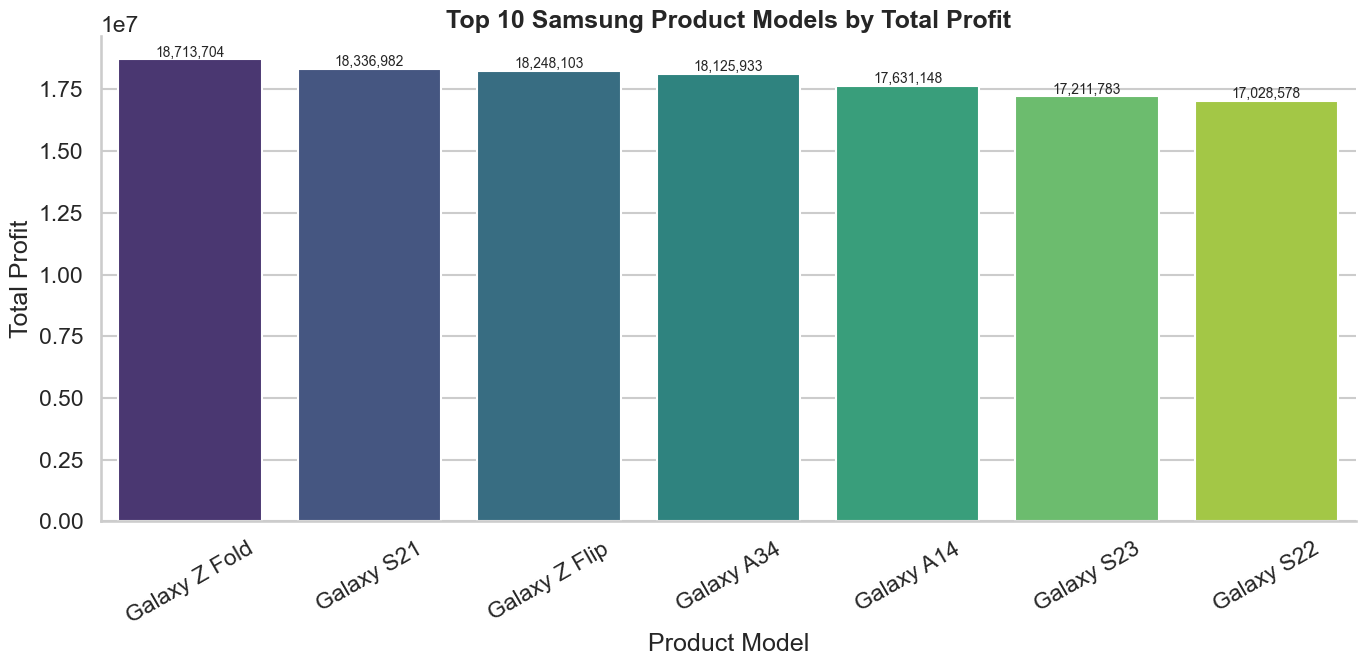

C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\2224014201.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


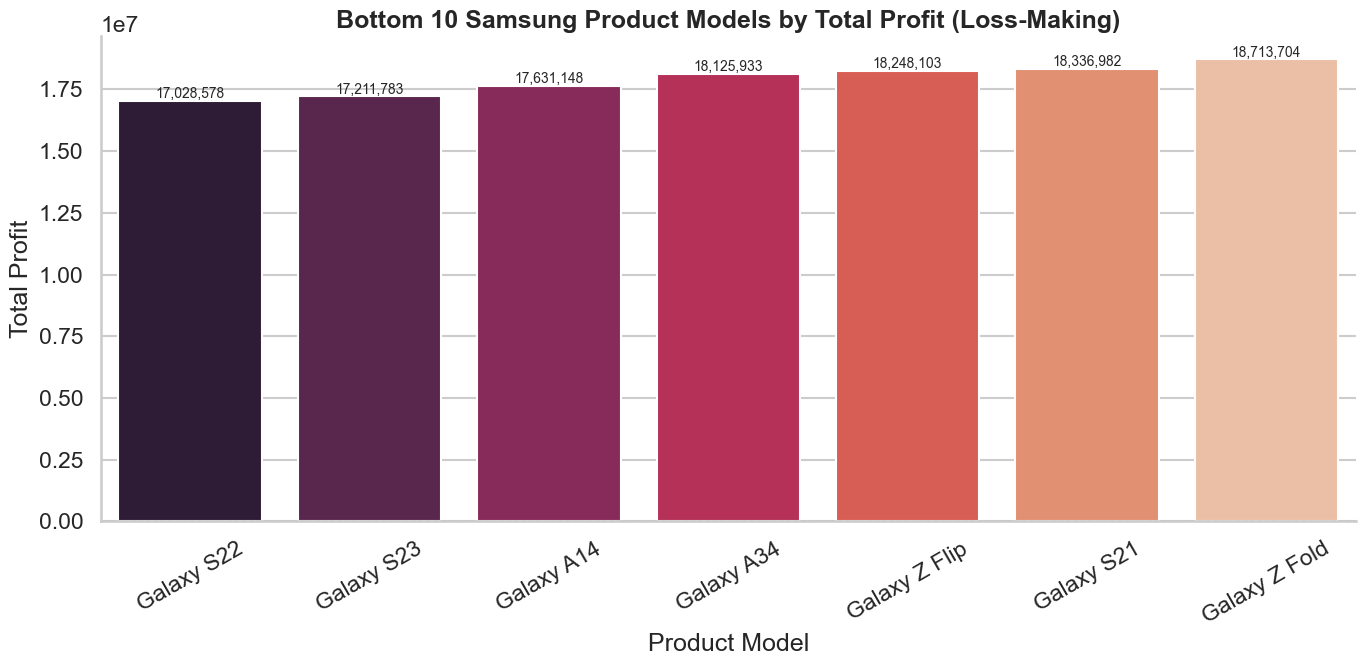

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure profit_by_model already exists from Step-1
profit_by_model = (
    df.groupby("product_model", as_index=False)["profit"]
      .sum()
      .sort_values("profit", ascending=False)
)

top10 = profit_by_model.head(10)
bottom10 = profit_by_model.tail(10).sort_values("profit")

# Global style
sns.set_theme(style="whitegrid", context="talk")

# -----------------------------
# Top 10 Profit Models
# -----------------------------
plt.figure(figsize=(14,7))

ax1 = sns.barplot(
    data=top10,
    x="product_model",
    y="profit",
    palette="viridis"
)

plt.title("Top 10 Samsung Product Models by Total Profit", weight="bold")
plt.xlabel("Product Model")
plt.ylabel("Total Profit")
plt.xticks(rotation=30)

# Value labels on bars
for p in ax1.patches:
    ax1.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()


# -----------------------------
# Bottom 10 Loss-Making Models
# -----------------------------
plt.figure(figsize=(14,7))

ax2 = sns.barplot(
    data=bottom10,
    x="product_model",
    y="profit",
    palette="rocket"
)

plt.title("Bottom 10 Samsung Product Models by Total Profit (Loss-Making)", weight="bold")
plt.xlabel("Product Model")
plt.ylabel("Total Profit")
plt.xticks(rotation=30)

# Value labels on bars
for p in ax2.patches:
    ax2.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='top' if p.get_height() < 0 else 'bottom',
        fontsize=10
    )

# Reference line for zero profit
plt.axhline(0, linestyle="--", linewidth=1)

sns.despine()
plt.tight_layout()
plt.show()

In [51]:
# 2️⃣ Which regions and countries contribute most to total profit?

In [52]:
# Region–Country total profit
region_country_profit = (
    df.groupby(["region", "country"], as_index=False)["profit"]
      .sum()
      .sort_values("profit", ascending=False)
)

# Top 10 region–country combinations by profit
top_region_country = region_country_profit.head(10)

# Region level profit (for management view)
region_profit = (
    df.groupby("region", as_index=False)["profit"]
      .sum()
      .sort_values("profit", ascending=False)
)

print("Top 10 Region–Country combinations by total profit")
print(top_region_country)

print("\nTotal Profit by Region")
print(region_profit)

Top 10 Region–Country combinations by total profit
           region       country      profit
20         Europe  South Africa  3508863.56
9            Asia        France  3441636.15
7          Africa           Usa  3393773.03
24  North America        Brazil  3367802.19
3          Africa         India  3363842.22
8            Asia        Brazil  3327108.37
32  South America        Brazil  3326663.18
19         Europe         India  3302385.51
33  South America        France  3269407.15
14           Asia            Uk  3254965.15

Total Profit by Region
          region       profit
1           Asia  25261836.49
0         Africa  25244607.49
3  North America  25040684.13
2         Europe  24962052.64
4  South America  24787049.66


C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\2109964699.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


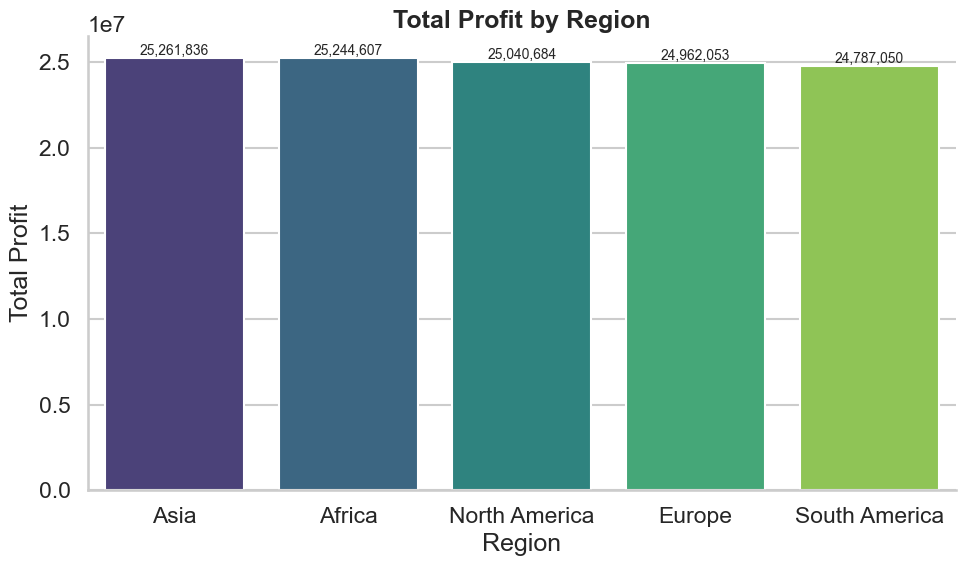

In [53]:
# Chart 1 – Total Profit by Region

sns.set_theme(style="whitegrid", context="talk")

# Region profit (recomputed safely)
region_profit = (
    df.groupby("region", as_index=False)["profit"]
      .sum()
      .sort_values("profit", ascending=False)
)

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=region_profit,
    x="region",
    y="profit",
    palette="viridis"
)

plt.title("Total Profit by Region", weight="bold")
plt.xlabel("Region")
plt.ylabel("Total Profit")

# Value labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,.0f}",
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha="center", va="bottom", fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

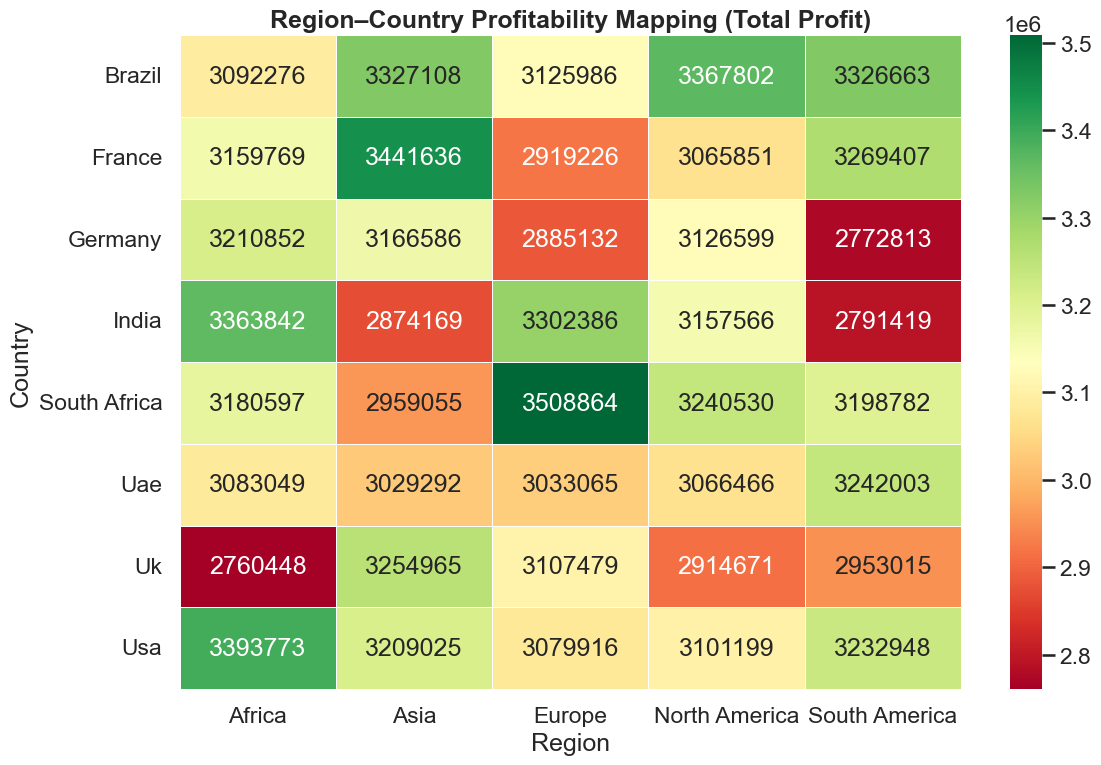

In [54]:
# Chart 2 – Region–Country profitability mapping (Heatmap)
# Pivot table for heatmap
heatmap_data = (
    df.pivot_table(
        values="profit",
        index="country",
        columns="region",
        aggfunc="sum"
    )
)

plt.figure(figsize=(12,8))

sns.heatmap(
    heatmap_data,
    cmap="RdYlGn",
    annot=True,
    fmt=".0f",
    linewidths=0.5,
    linecolor="white"
)

plt.title("Region–Country Profitability Mapping (Total Profit)", weight="bold")
plt.xlabel("Region")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

In [55]:
# ✅ Q3 – Which product models are consistently loss-making even at low discounts?

In [56]:
# ---------------------------------------------
# Definition:
# Low discount = <= 10%
# Consistently loss-making:
#   - average profit < 0
#   - enough observations (>= 100 orders)
# ---------------------------------------------

low_discount_df = df[df["discount_%"] <= 10]

model_loss_summary = (
    low_discount_df
        .groupby("product_model")
        .agg(
            avg_profit=("profit", "mean"),
            total_profit=("profit", "sum"),
            order_count=("profit", "count")
        )
        .reset_index()
)

structural_loss_models = (
    model_loss_summary[
        (model_loss_summary["avg_profit"] < 0) &
        (model_loss_summary["order_count"] >= 100)
    ]
    .sort_values("avg_profit")
)

structural_loss_models

,product_model,avg_profit,total_profit,order_count


In [57]:
df["discount_%"] <= 10

0        False
1         True
2         True
3         True
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: discount_%, Length: 50000, dtype: bool

In [60]:
sns.set_theme(style="whitegrid", context="talk")

# If no model qualifies, this avoids plotting error
if not structural_loss_models.empty:

    plt.figure(figsize=(12,7))

    ax = sns.barplot(
        data=structural_loss_models,
        x="product_model",
        y="avg_profit",
        palette="Reds_r"
    )

    plt.title(
        "Structurally Loss-Making Product Models\n(Low Discount ≤ 10%)",
        weight="bold"
    )
    plt.xlabel("Product Model")
    plt.ylabel("Average Profit per Order")

    plt.xticks(rotation=30)

    # Reference line at zero profit
    plt.axhline(
        y=0,
        linestyle="--",
        linewidth=1.2,
        color="black"
    )

    # Value labels
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.0f}",
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha="center",
            va="top",
            fontsize=10
        )

    sns.despine()
    plt.tight_layout()
    plt.show()

else:
    print("No product model is consistently loss-making under low discount criteria.")

No product model is consistently loss-making under low discount criteria.


In [61]:
# ✅ Q4 – Do higher discounts actually increase profit or reduce profit?

In [62]:
# --------------------------------------------
# Create discount buckets (business friendly)
# --------------------------------------------
bins = [-1, 0, 5, 10, 15, 20, 30, 100]
labels = ["0%", "1–5%", "6–10%", "11–15%", "16–20%", "21–30%", "30%+"]

df["discount_bucket"] = pd.cut(
    df["discount_%"],
    bins=bins,
    labels=labels
)

# --------------------------------------------
# Profit behaviour by discount bucket
# --------------------------------------------
discount_profit_summary = (
    df.groupby("discount_bucket")
      .agg(
          avg_profit=("profit", "mean"),
          total_profit=("profit", "sum"),
          avg_revenue=("revenue", "mean"),
          order_count=("profit", "count")
      )
      .reset_index()
)

# Correlation between discount and profit
correlation = df["discount_%"].corr(df["profit"])

print(discount_profit_summary)
print("\nCorrelation between Discount % and Profit :", round(correlation, 3))

  discount_bucket   avg_profit  total_profit   avg_revenue  order_count
0              0%  6270.515249   45774761.32  24987.059914         7300
1            1–5%  5010.055563   35501253.72  23725.935579         7086
2           6–10%  3716.856959   26534641.83  22501.113858         7139
3          11–15%  2397.416850   16954531.96  20875.045619         7072
4          16–20%  1237.124143    8795952.66  19795.418383         7110
5          21–30%  -578.248869   -8264911.08  17968.765119        14293
6            30%+          NaN          0.00           NaN            0

Correlation between Discount % and Profit : -0.536


C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\3710934068.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("discount_bucket")


In [63]:
correlation = df["discount_%"].corr(df["profit"])

C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\2976502975.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


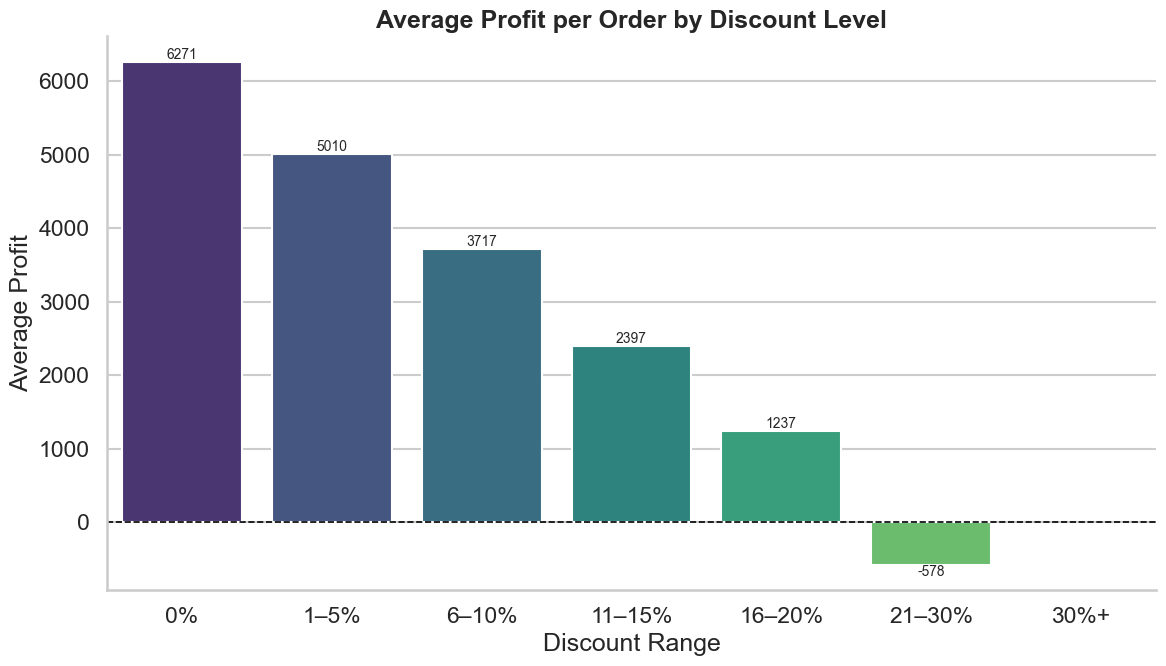

In [64]:
# Chart-1 – Average profit by discount level

sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(12,7))

ax = sns.barplot(
    data=discount_profit_summary,
    x="discount_bucket",
    y="avg_profit",
    palette="viridis"
)

plt.title("Average Profit per Order by Discount Level", weight="bold")
plt.xlabel("Discount Range")
plt.ylabel("Average Profit")

# Zero profit reference line
plt.axhline(y=0, linestyle="--", linewidth=1.2, color="black")

# Value labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center",
        va="bottom" if p.get_height() >= 0 else "top",
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

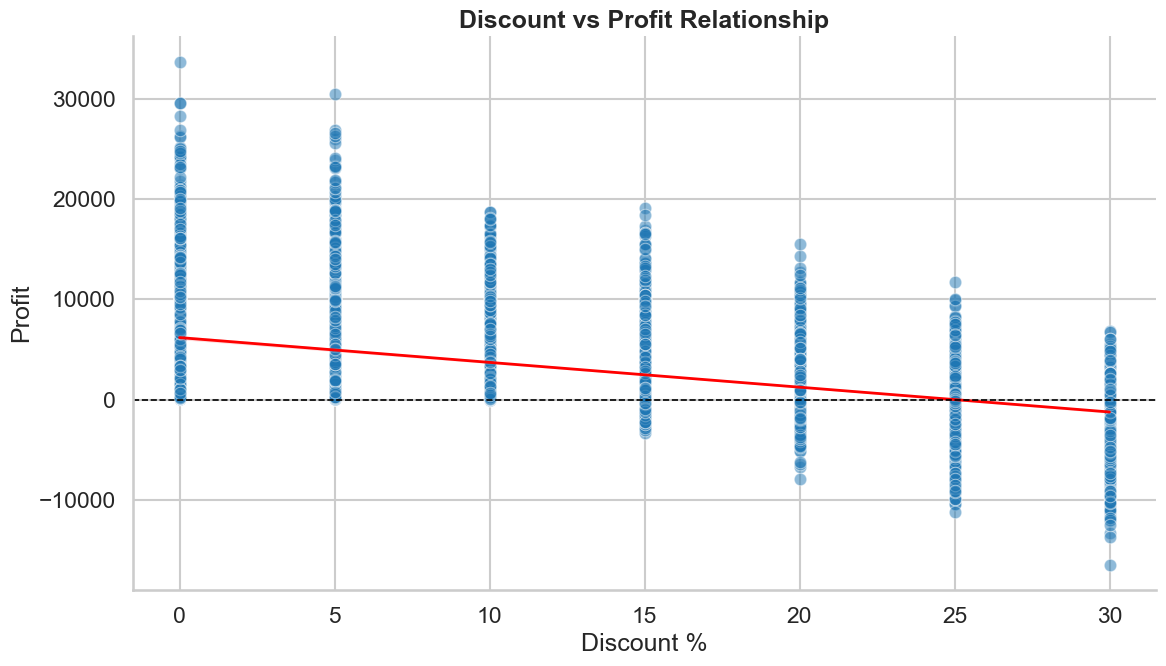

In [65]:
# Chart-2 – Discount vs profit (with trend line)
plt.figure(figsize=(12,7))

ax = sns.scatterplot(
    data=df.sample(8000, random_state=42),   # sample for clean rendering
    x="discount_%",
    y="profit",
    alpha=0.5,
    color="#1f77b4"
)

sns.regplot(
    data=df.sample(8000, random_state=42),
    x="discount_%",
    y="profit",
    scatter=False,
    color="red",
    line_kws={"linewidth":2}
)

plt.title("Discount vs Profit Relationship", weight="bold")
plt.xlabel("Discount %")
plt.ylabel("Profit")

# Zero profit reference line
plt.axhline(y=0, linestyle="--", linewidth=1.2, color="black")

sns.despine()
plt.tight_layout()
plt.show()

In [66]:
# ✅ Q5 – Which sales channels generate the highest profit per order?

In [67]:
# ------------------------------------------
# Profit per order by sales channel
# ------------------------------------------
channel_profit_summary = (
    df.groupby("sales_channel")
      .agg(
          avg_profit_per_order=("profit", "mean"),
          total_profit=("profit", "sum"),
          total_orders=("profit", "count"),
          avg_discount=("discount_%", "mean")
      )
      .reset_index()
      .sort_values("avg_profit_per_order", ascending=False)
)

channel_profit_summary

,sales_channel,avg_profit_per_order,total_profit,total_orders,avg_discount
0,Distributor,2528.019617,31665973.72,12526,14.989222
3,Retail,2507.143605,31635138.01,12618,14.921937
2,Online,2501.577247,31427314.95,12563,15.020298
1,E-Commerce,2486.602435,30567803.73,12293,14.904010


C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\1777461830.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


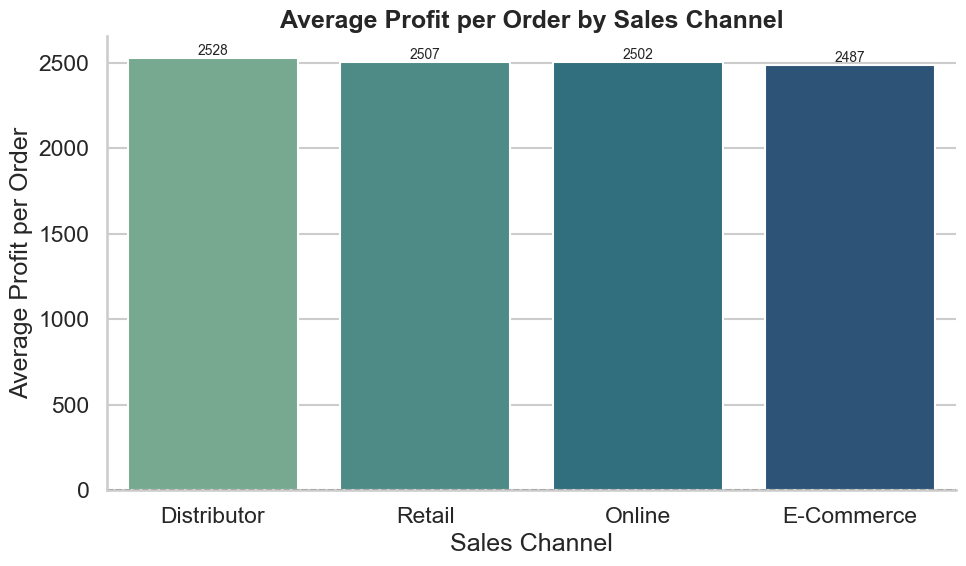

In [68]:
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=channel_profit_summary,
    x="sales_channel",
    y="avg_profit_per_order",
    palette="crest"
)

plt.title("Average Profit per Order by Sales Channel", weight="bold")
plt.xlabel("Sales Channel")
plt.ylabel("Average Profit per Order")

# Zero reference line
plt.axhline(y=0, linestyle="--", linewidth=1.2, color="black")

# Value labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center",
        va="bottom" if p.get_height() >= 0 else "top",
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

In [69]:
# ✅ Q6 – Which campaigns generate the best ROI?

In [70]:
# Remove missing / undefined campaigns
campaign_df = df[df["campaign_name"].notna()]

# -----------------------------------------
# Campaign level performance
# ROI = Total Profit / Total Revenue
# -----------------------------------------
campaign_performance = (
    campaign_df
        .groupby("campaign_name")
        .agg(
            total_revenue=("revenue", "sum"),
            total_profit=("profit", "sum"),
            avg_profit_per_order=("profit", "mean"),
            total_orders=("profit", "count")
        )
        .reset_index()
)

# Avoid division by zero
campaign_performance["roi"] = np.where(
    campaign_performance["total_revenue"] == 0,
    0,
    campaign_performance["total_profit"] / campaign_performance["total_revenue"]
)

# Sort by ROI (descending)
campaign_performance = campaign_performance.sort_values(
    "roi", ascending=False
)

campaign_performance

,campaign_name,total_revenue,total_profit,avg_profit_per_order,total_orders,roi
1,Promo1,2.657759e+08,31701288.66,2534.886347,12506,0.119278
2,Promo2,2.621502e+08,31159528.85,2513.067897,12399,0.118861
0,Holidaysale,2.640140e+08,31177357.81,2494.987021,12496,0.118090


C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\4115880026.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


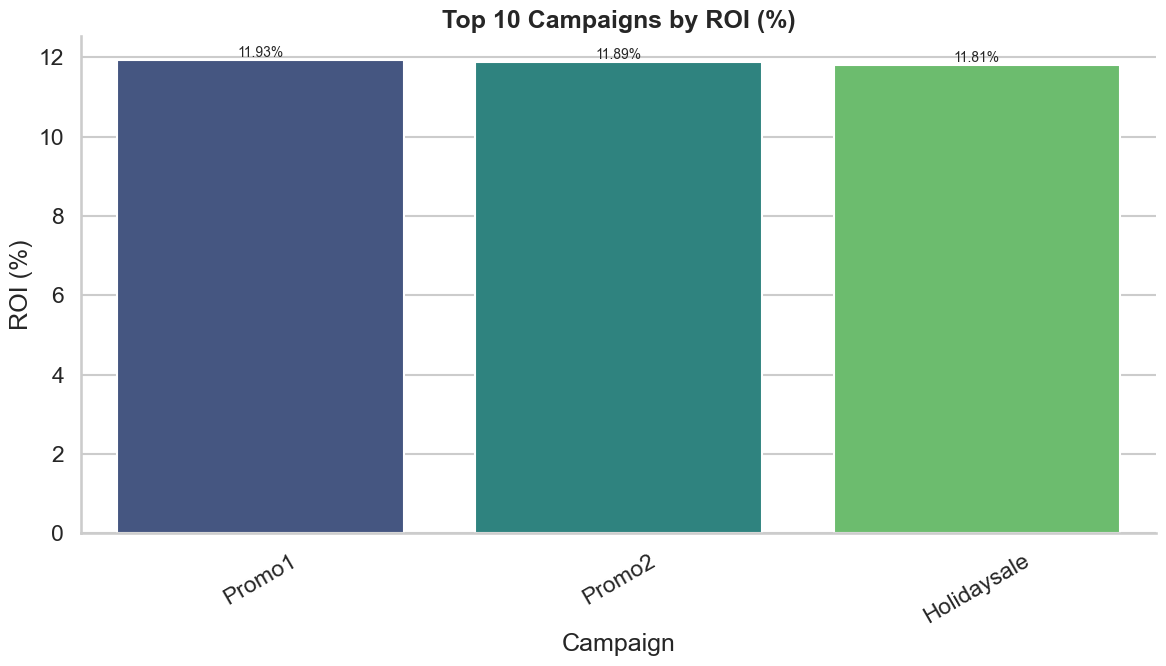

In [71]:
sns.set_theme(style="whitegrid", context="talk")

# Convert ROI to percentage for visualization
campaign_performance["roi_percent"] = campaign_performance["roi"] * 100

# Take top 10 campaigns by ROI
top_roi_campaigns = campaign_performance.head(10)

plt.figure(figsize=(12,7))

ax = sns.barplot(
    data=top_roi_campaigns,
    x="campaign_name",
    y="roi_percent",
    palette="viridis"
)

plt.title("Top 10 Campaigns by ROI (%)", weight="bold")
plt.xlabel("Campaign")
plt.ylabel("ROI (%)")
plt.xticks(rotation=30)

# Value labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

In [72]:
# ✅ Q7 – Which customer segments are most profitable?

In [73]:
# -------------------------------------------
# Customer segment profitability
# -------------------------------------------
segment_profit_summary = (
    df.groupby("customer_segment")
      .agg(
          avg_profit_per_order=("profit", "mean"),
          total_profit=("profit", "sum"),
          total_orders=("profit", "count"),
          avg_revenue_per_order=("revenue", "mean")
      )
      .reset_index()
      .sort_values("avg_profit_per_order", ascending=False)
)

segment_profit_summary

,customer_segment,avg_profit_per_order,total_profit,total_orders,avg_revenue_per_order
1,Low,2522.562599,31640502.68,12543,20787.107151
2,Medium,2497.868392,31268316.53,12518,21219.784065
0,High,2489.691595,31131103.71,12504,21183.492098


C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\3331969452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


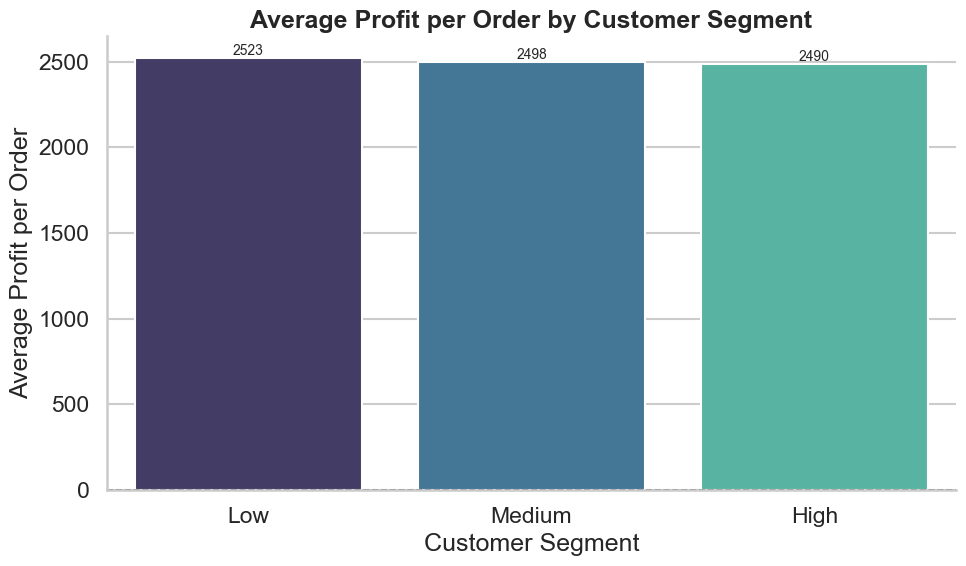

In [74]:
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=segment_profit_summary,
    x="customer_segment",
    y="avg_profit_per_order",
    palette="mako"
)

plt.title("Average Profit per Order by Customer Segment", weight="bold")
plt.xlabel("Customer Segment")
plt.ylabel("Average Profit per Order")

# Zero reference line
plt.axhline(y=0, linestyle="--", linewidth=1.2, color="black")

# Value labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center",
        va="bottom" if p.get_height() >= 0 else "top",
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

In [75]:
# ✅ Q8 – Which product models have high revenue but low profit?

In [76]:
# -----------------------------------------
# Product level revenue & profit summary
# -----------------------------------------
product_perf = (
    df.groupby("product_model")
      .agg(
          total_revenue=("revenue", "sum"),
          total_profit=("profit", "sum"),
          avg_discount=("discount_%", "mean"),
          avg_unit_cost=("unit_cost", "mean"),
          orders=("profit", "count")
      )
      .reset_index()
)

# Profit margin
product_perf["profit_margin"] = (
    product_perf["total_profit"] / product_perf["total_revenue"]
)

# -----------------------------------------
# Define "high revenue" and "low profit"
# using data driven thresholds
# -----------------------------------------
revenue_threshold = product_perf["total_revenue"].quantile(0.75)
margin_threshold  = product_perf["profit_margin"].quantile(0.25)

inefficient_models = (
    product_perf[
        (product_perf["total_revenue"] >= revenue_threshold) &
        (product_perf["profit_margin"] <= margin_threshold)
    ]
    .sort_values("total_revenue", ascending=False)
)

inefficient_models

,product_model,total_revenue,total_profit,avg_discount,avg_unit_cost,orders,profit_margin


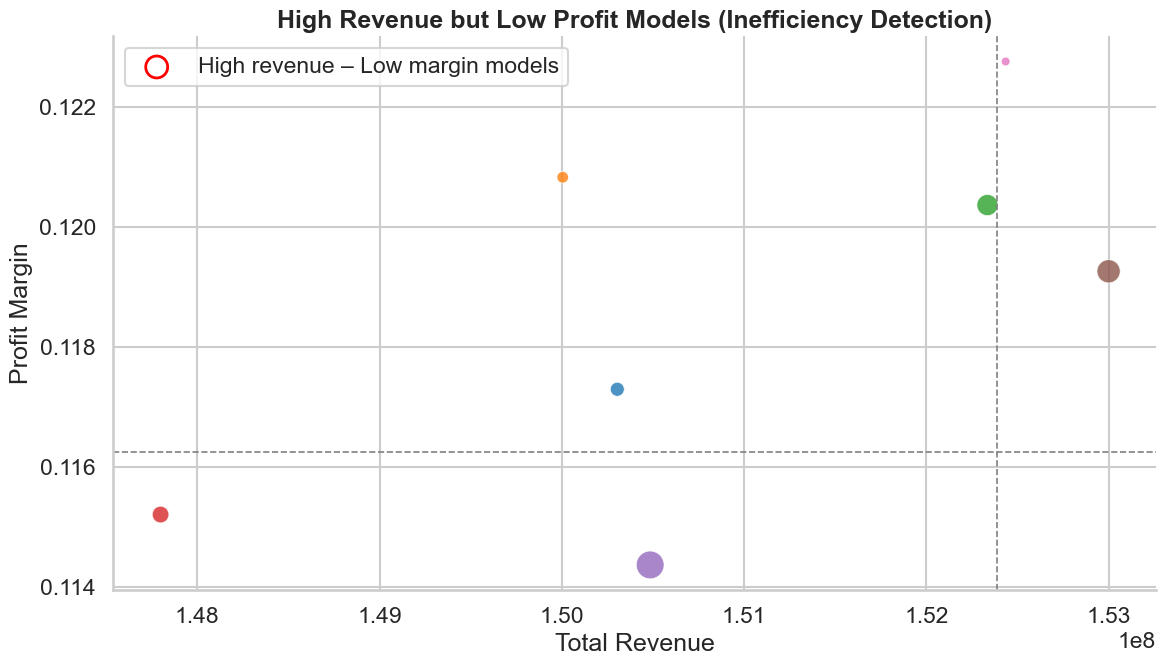

In [77]:
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(12,7))

ax = sns.scatterplot(
    data=product_perf,
    x="total_revenue",
    y="profit_margin",
    size="orders",
    sizes=(40, 400),
    hue="product_model",
    legend=False,
    palette="tab10",
    alpha=0.8
)

# Highlight inefficient models
highlight = product_perf[
    product_perf["product_model"].isin(inefficient_models["product_model"])
]

plt.scatter(
    highlight["total_revenue"],
    highlight["profit_margin"],
    s=250,
    facecolors="none",
    edgecolors="red",
    linewidths=2,
    label="High revenue – Low margin models"
)

# Threshold reference lines
plt.axvline(revenue_threshold, linestyle="--", color="grey", linewidth=1.2)
plt.axhline(margin_threshold, linestyle="--", color="grey", linewidth=1.2)

plt.title("High Revenue but Low Profit Models (Inefficiency Detection)", weight="bold")
plt.xlabel("Total Revenue")
plt.ylabel("Profit Margin")

plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

In [78]:
# ✅ Q9 – Which countries show high sales volume but poor profitability?

In [79]:
# -------------------------------------------------------
# Country level performance
# Volume  -> total units sold (Quantity)
# Profitability -> profit margin
# -------------------------------------------------------
country_perf = (
    df.groupby("country")
      .agg(
          total_units_sold=("quantity", "sum"),
          total_revenue=("revenue", "sum"),
          total_profit=("profit", "sum"),
          orders=("profit", "count")
      )
      .reset_index()
)

# Profit margin
country_perf["profit_margin"] = (
    country_perf["total_profit"] / country_perf["total_revenue"]
)

# -------------------------------------------------------
# Data-driven thresholds
# High volume  = top 25% of total units sold
# Low margin   = bottom 25% of profit margin
# -------------------------------------------------------
volume_threshold = country_perf["total_units_sold"].quantile(0.75)
margin_threshold = country_perf["profit_margin"].quantile(0.25)

# High-volume but poor-profitability countries
problem_countries = (
    country_perf[
        (country_perf["total_units_sold"] >= volume_threshold) &
        (country_perf["profit_margin"] <= margin_threshold)
    ]
    .sort_values("total_units_sold", ascending=False)
)

problem_countries

,country,total_units_sold,total_revenue,total_profit,orders,profit_margin
6,Uk,160208,1.317829e+08,14990577.65,6320,0.113752


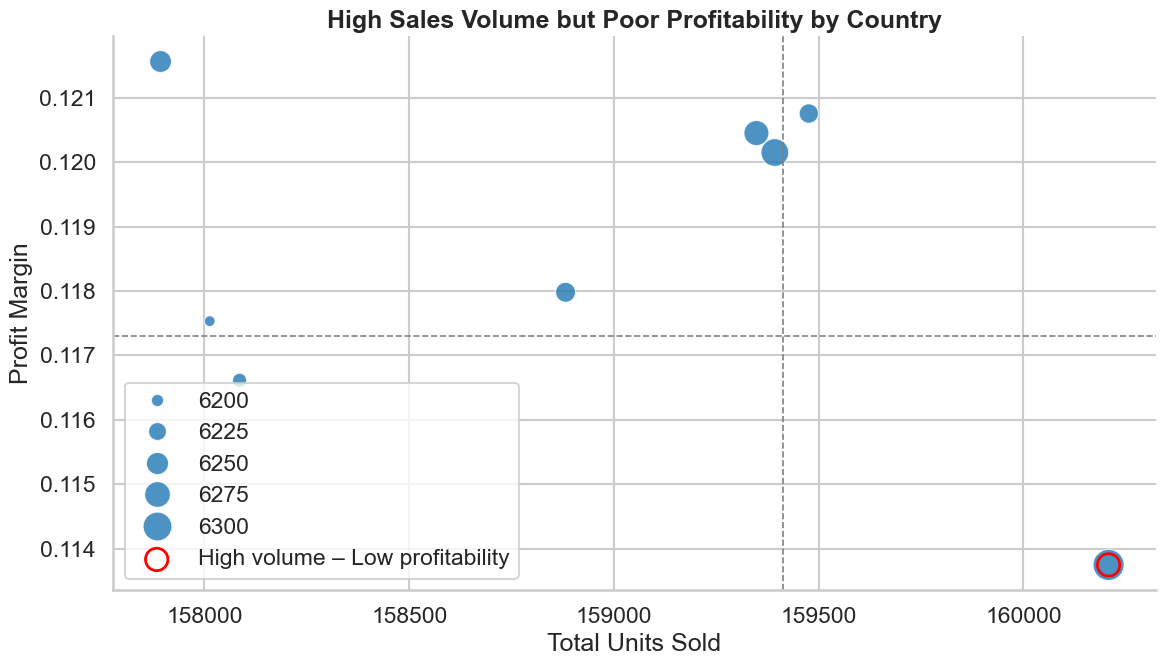

In [80]:
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(12,7))

ax = sns.scatterplot(
    data=country_perf,
    x="total_units_sold",
    y="profit_margin",
    size="orders",
    sizes=(60, 500),
    alpha=0.8,
    color="#1f77b4"
)

# Highlight high-volume & low-margin countries
highlight = country_perf[
    country_perf["country"].isin(problem_countries["country"])
]

plt.scatter(
    highlight["total_units_sold"],
    highlight["profit_margin"],
    s=260,
    facecolors="none",
    edgecolors="red",
    linewidths=2,
    label="High volume – Low profitability"
)

# Threshold reference lines
plt.axvline(volume_threshold, linestyle="--", color="grey", linewidth=1.2)
plt.axhline(margin_threshold, linestyle="--", color="grey", linewidth=1.2)

plt.title("High Sales Volume but Poor Profitability by Country", weight="bold")
plt.xlabel("Total Units Sold")
plt.ylabel("Profit Margin")

plt.legend()
sns.despine()
plt.tight_layout()
plt.show()

In [81]:
# ✅ Q10 – Does delivery status impact customer ratings and future profit?

In [82]:
# ---------------------------------------------------
# Delivery performance impact
# ---------------------------------------------------
delivery_perf = (
    df.groupby("delivery_status")
      .agg(
          avg_customer_rating=("customer_rating", "mean"),
          avg_profit_per_order=("profit", "mean"),
          total_profit=("profit", "sum"),
          total_orders=("profit", "count"),
          avg_discount=("discount_%", "mean")
      )
      .reset_index()
      .sort_values("avg_customer_rating", ascending=False)
)

delivery_perf

,delivery_status,avg_customer_rating,avg_profit_per_order,total_profit,total_orders,avg_discount
3,Returned,4.278793,2501.796247,31002259.09,12392,14.934635
1,Delivered,4.277564,2460.129551,30965650.66,12587,15.063558
0,Cancelled,4.274946,2531.420888,31695920.94,12521,15.010383
2,In Transit,4.272768,2530.591978,31632399.72,12500,14.826800


C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\114249817.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


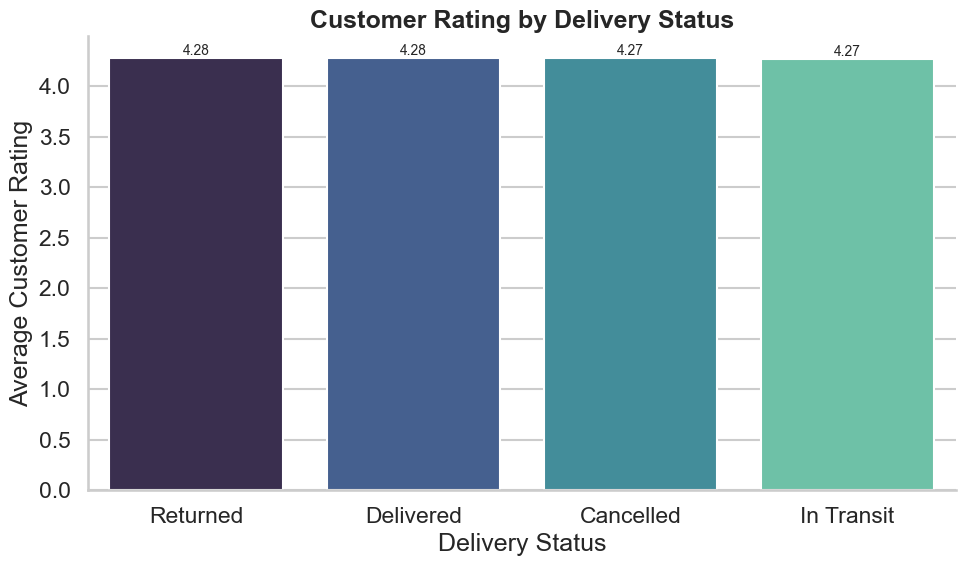

In [83]:
# 🔹 Chart-1 – Average customer rating by delivery status
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))

ax1 = sns.barplot(
    data=delivery_perf,
    x="delivery_status",
    y="avg_customer_rating",
    palette="mako"
)

plt.title("Customer Rating by Delivery Status", weight="bold")
plt.xlabel("Delivery Status")
plt.ylabel("Average Customer Rating")

for p in ax1.patches:
    ax1.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom", fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\558266465.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


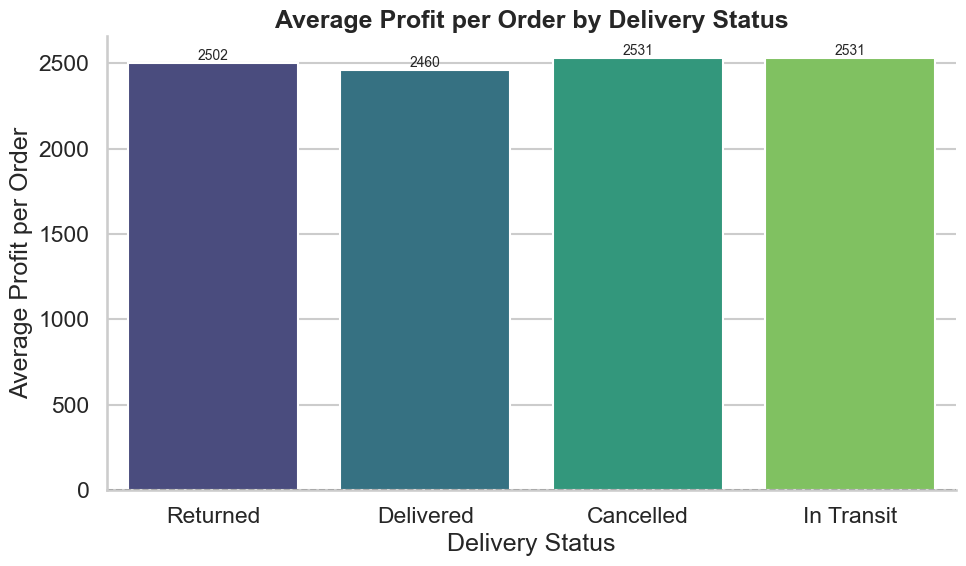

In [84]:
# 🔹 Chart-2 – Average profit per order by delivery status
plt.figure(figsize=(10,6))

ax2 = sns.barplot(
    data=delivery_perf,
    x="delivery_status",
    y="avg_profit_per_order",
    palette="viridis"
)

plt.title("Average Profit per Order by Delivery Status", weight="bold")
plt.xlabel("Delivery Status")
plt.ylabel("Average Profit per Order")

# Zero profit reference line
plt.axhline(y=0, linestyle="--", linewidth=1.2, color="black")

for p in ax2.patches:
    ax2.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center",
        va="bottom" if p.get_height() >= 0 else "top",
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

In [85]:
# ✅ Q11 – Which salespersons generate the highest profit contribution?

In [86]:
# -----------------------------------------
# Salesperson performance summary
# -----------------------------------------
sales_perf = (
    df.groupby("sales_person")
      .agg(
          total_profit=("profit", "sum"),
          avg_profit_per_order=("profit", "mean"),
          total_orders=("profit", "count"),
          total_revenue=("revenue", "sum"),
          avg_discount=("discount_%", "mean")
      )
      .reset_index()
)

# Rank by total profit contribution
sales_perf = sales_perf.sort_values("total_profit", ascending=False)

# Top and bottom performers
top_salespersons = sales_perf.head(5)
bottom_salespersons = sales_perf.tail(5)

print("Top 5 Salespersons by Total Profit Contribution")
print(top_salespersons)

print("\nBottom 5 Salespersons by Total Profit Contribution")
print(bottom_salespersons)

Top 5 Salespersons by Total Profit Contribution
  sales_person  total_profit  avg_profit_per_order  total_orders  \
2         Chen   18942402.43           2633.815688          7192   
4         John   18032619.77           2512.906880          7176   
5        Rohit   17983701.29           2476.411635          7262   
6         Sara   17821895.12           2496.063742          7140   
3        Emily   17650588.50           2512.539288          7025   

   total_revenue  avg_discount  
2   1.555570e+08     14.872080  
4   1.489676e+08     14.794454  
5   1.517706e+08     15.183834  
6   1.512004e+08     14.911064  
3   1.486203e+08     14.793594  

Bottom 5 Salespersons by Total Profit Contribution
  sales_person  total_profit  avg_profit_per_order  total_orders  \
5        Rohit   17983701.29           2476.411635          7262   
6         Sara   17821895.12           2496.063742          7140   
3        Emily   17650588.50           2512.539288          7025   
0          Ali   1759

C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\465861446.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


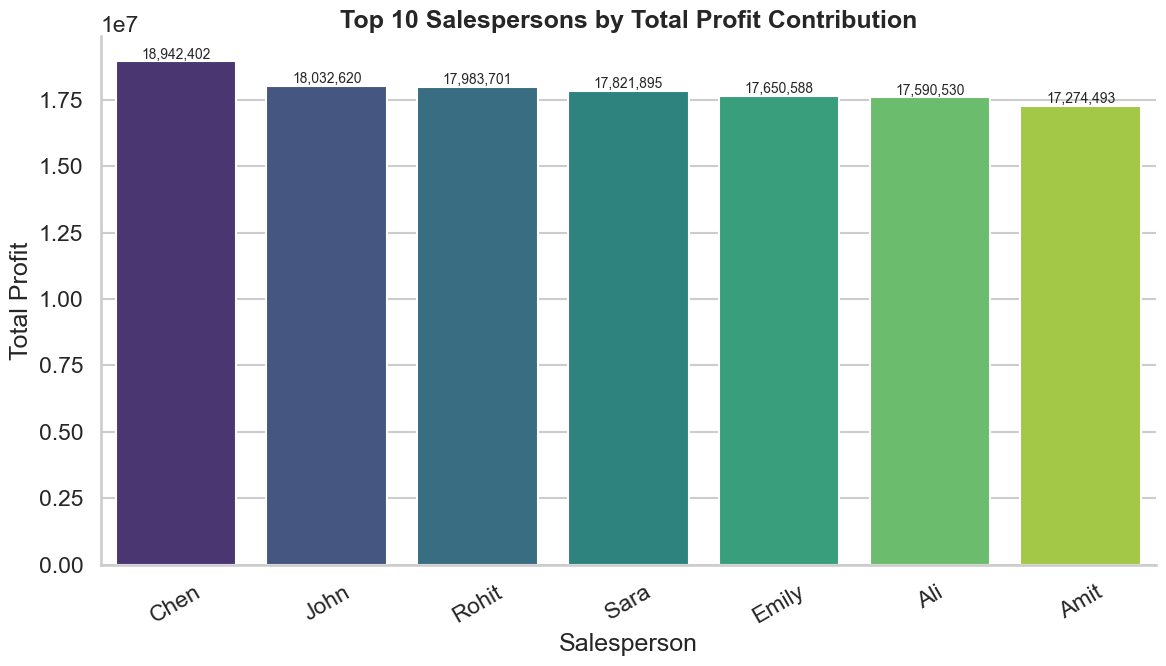

In [87]:
# 🔹 Chart-1 – Top salespersons by total profit

sns.set_theme(style="whitegrid", context="talk")

top10_sales = sales_perf.head(10)

plt.figure(figsize=(12,7))

ax = sns.barplot(
    data=top10_sales,
    x="sales_person",
    y="total_profit",
    palette="viridis"
)

plt.title("Top 10 Salespersons by Total Profit Contribution", weight="bold")
plt.xlabel("Salesperson")
plt.ylabel("Total Profit")
plt.xticks(rotation=30)

# Value labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom", fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\3438487700.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


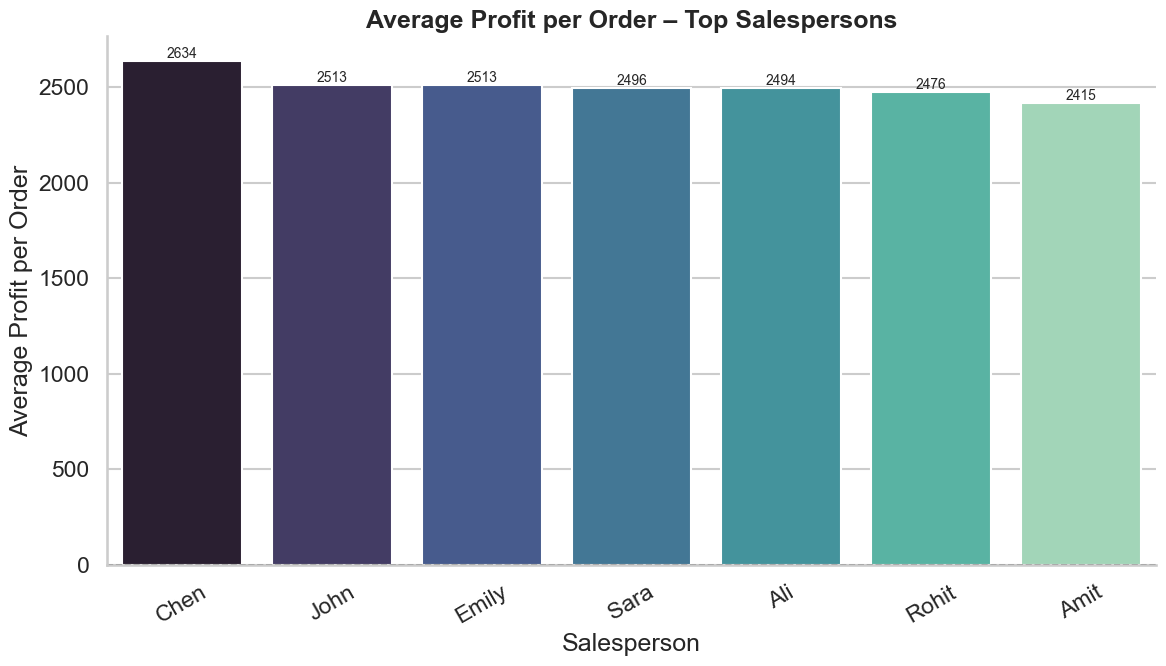

In [88]:
# 🔹 Chart-2 – Average profit per order by salesperson (efficiency view)
plt.figure(figsize=(12,7))

ax2 = sns.barplot(
    data=top10_sales.sort_values("avg_profit_per_order", ascending=False),
    x="sales_person",
    y="avg_profit_per_order",
    palette="mako"
)

plt.title("Average Profit per Order – Top Salespersons", weight="bold")
plt.xlabel("Salesperson")
plt.ylabel("Average Profit per Order")
plt.xticks(rotation=30)

# Zero profit reference line
plt.axhline(y=0, linestyle="--", linewidth=1.2, color="black")

for p in ax2.patches:
    ax2.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center",
        va="bottom" if p.get_height() >= 0 else "top",
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

In [89]:
# ✅ Q12 – Which network type (4G vs 5G) customers generate higher profit?

In [90]:
# ---------------------------------------
# Network type profitability summary
# ---------------------------------------
network_perf = (
    df.groupby("network_type")
      .agg(
          avg_profit_per_order=("profit", "mean"),
          total_profit=("profit", "sum"),
          total_orders=("profit", "count"),
          avg_revenue_per_order=("revenue", "mean"),
          avg_discount=("discount_%", "mean")
      )
      .reset_index()
      .sort_values("avg_profit_per_order", ascending=False)
)

network_perf

,network_type,avg_profit_per_order,total_profit,total_orders,avg_revenue_per_order,avg_discount
1,5G,2516.749761,63021930.77,25041,21163.447903,14.903358
0,4G,2495.063890,62274299.64,24959,21091.004325,15.015025


C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\1097195271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


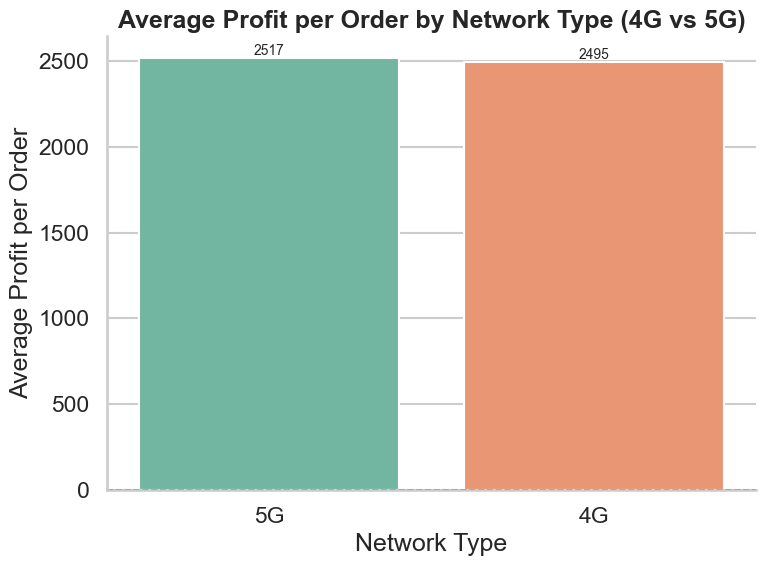

In [91]:
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(8,6))

ax = sns.barplot(
    data=network_perf,
    x="network_type",
    y="avg_profit_per_order",
    palette="Set2"
)

plt.title("Average Profit per Order by Network Type (4G vs 5G)", weight="bold")
plt.xlabel("Network Type")
plt.ylabel("Average Profit per Order")

# Zero profit reference line
plt.axhline(y=0, linestyle="--", linewidth=1.2, color="black")

# Value labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center",
        va="bottom" if p.get_height() >= 0 else "top",
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

In [92]:
# ✅ Q13 – Which location type (Urban / Semi-Urban / Rural) produces the highest profit per order?

In [93]:
# -----------------------------------------
# Location type profitability
# -----------------------------------------
location_perf = (
    df.groupby("customer_location_type")
      .agg(
          avg_profit_per_order=("profit", "mean"),
          total_profit=("profit", "sum"),
          total_orders=("profit", "count"),
          avg_revenue_per_order=("revenue", "mean"),
          avg_discount=("discount_%", "mean")
      )
      .reset_index()
      .sort_values("avg_profit_per_order", ascending=False)
)

location_perf

,customer_location_type,avg_profit_per_order,total_profit,total_orders,avg_revenue_per_order,avg_discount
2,Urban,2555.345614,42319078.72,16561,21053.801711,14.897047
0,Rural,2538.438160,42429993.84,16715,21304.298474,14.978462
1,Semi-Urban,2424.489228,40547157.85,16724,21023.135418,15.001196


C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\579029287.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


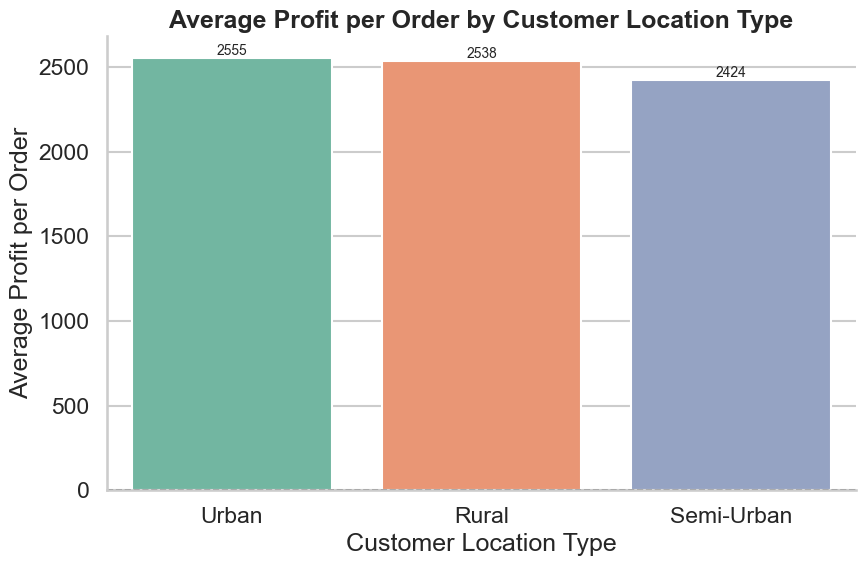

In [94]:
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(9,6))

ax = sns.barplot(
    data=location_perf,
    x="customer_location_type",
    y="avg_profit_per_order",
    palette="Set2"
)

plt.title("Average Profit per Order by Customer Location Type", weight="bold")
plt.xlabel("Customer Location Type")
plt.ylabel("Average Profit per Order")

# Zero profit reference line
plt.axhline(y=0, linestyle="--", linewidth=1.2, color="black")

# Value labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center",
        va="bottom" if p.get_height() >= 0 else "top",
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

In [95]:
# ✅ Q14 – Which OS versions are associated with higher-value purchases?

In [96]:
# -----------------------------------------
# OS level value & profitability summary
# -----------------------------------------
os_perf = (
    df.groupby("os_version")
      .agg(
          avg_revenue_per_order=("revenue", "mean"),
          avg_profit_per_order=("profit", "mean"),
          total_revenue=("revenue", "sum"),
          total_profit=("profit", "sum"),
          total_orders=("profit", "count"),
          avg_discount=("discount_%", "mean")
      )
      .reset_index()
      .sort_values("avg_revenue_per_order", ascending=False)
)

os_perf

,os_version,avg_revenue_per_order,avg_profit_per_order,total_revenue,total_profit,total_orders,avg_discount
2,Android 14,21204.480232,2550.266949,3.528213e+08,42433891.76,16639,14.993990
1,Android 13,21098.534205,2470.648872,3.509952e+08,41101714.63,16636,14.932676
0,Android 12,21079.086054,2496.898297,3.525477e+08,41760624.02,16725,14.950673


C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\3290535839.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(


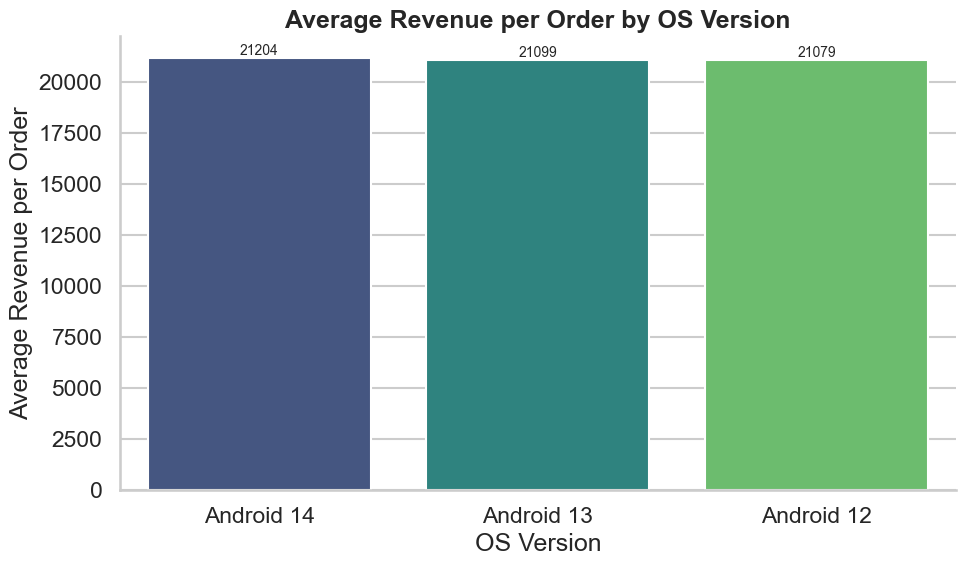

In [97]:
# 🔹 Chart-1 – Average revenue per order by OS version
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))

ax1 = sns.barplot(
    data=os_perf,
    x="os_version",
    y="avg_revenue_per_order",
    palette="viridis"
)

plt.title("Average Revenue per Order by OS Version", weight="bold")
plt.xlabel("OS Version")
plt.ylabel("Average Revenue per Order")

for p in ax1.patches:
    ax1.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center", va="bottom", fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\2457603436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


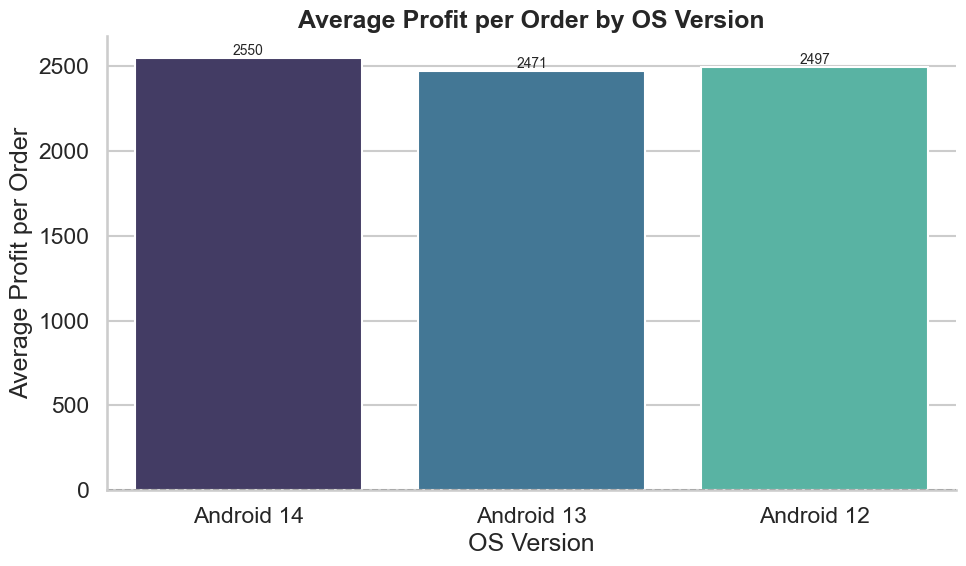

In [98]:
# 🔹 Chart-2 – Average profit per order by OS version
plt.figure(figsize=(10,6))

ax2 = sns.barplot(
    data=os_perf,
    x="os_version",
    y="avg_profit_per_order",
    palette="mako"
)

plt.title("Average Profit per Order by OS Version", weight="bold")
plt.xlabel("OS Version")
plt.ylabel("Average Profit per Order")

# Zero profit reference line
plt.axhline(y=0, linestyle="--", linewidth=1.2, color="black")

for p in ax2.patches:
    ax2.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center",
        va="bottom" if p.get_height() >= 0 else "top",
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()

In [99]:
"""# ✅ Q15 – What is the overall profit leakage caused by

high discounts

cancellations

returned deliveries

→ Direct profit loss estimation"""

'# ✅ Q15 – What is the overall profit leakage caused by\n\nhigh discounts\n\ncancellations\n\nreturned deliveries\n\n→ Direct profit loss estimation'

In [100]:
# --------------------------------------------------
# Business definitions
# --------------------------------------------------
# High discount threshold
HIGH_DISCOUNT_THRESHOLD = 20

# --------------------------------------------------
# 1. Profit leakage due to high discounts
# (sum of profit from orders having high discount)
# --------------------------------------------------
high_discount_df = df[df["discount_%"] > HIGH_DISCOUNT_THRESHOLD]

high_discount_leakage = high_discount_df["profit"].sum()

# --------------------------------------------------
# 2. Profit leakage due to cancelled deliveries
# --------------------------------------------------
cancelled_df = df[df["delivery_status"].str.lower() == "cancelled"]

cancelled_leakage = cancelled_df["profit"].sum()

# --------------------------------------------------
# 3. Profit leakage due to returned deliveries
# --------------------------------------------------
returned_df = df[df["delivery_status"].str.lower() == "returned"]

returned_leakage = returned_df["profit"].sum()

# --------------------------------------------------
# Final leakage summary
# --------------------------------------------------
leakage_summary = pd.DataFrame({
    "Leakage Source": [
        "High Discount Orders (>20%)",
        "Cancelled Deliveries",
        "Returned Deliveries"
    ],
    "Total Profit Impact": [
        high_discount_leakage,
        cancelled_leakage,
        returned_leakage
    ]
})

# Total combined leakage
total_leakage = leakage_summary["Total Profit Impact"].sum()

leakage_summary, total_leakage

(                Leakage Source  Total Profit Impact
 0  High Discount Orders (>20%)          -8264911.08
 1         Cancelled Deliveries          31695920.94
 2          Returned Deliveries          31002259.09,
 np.float64(54433268.95))

C:\Users\sc978\AppData\Local\Temp\ipykernel_3996\1832819209.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


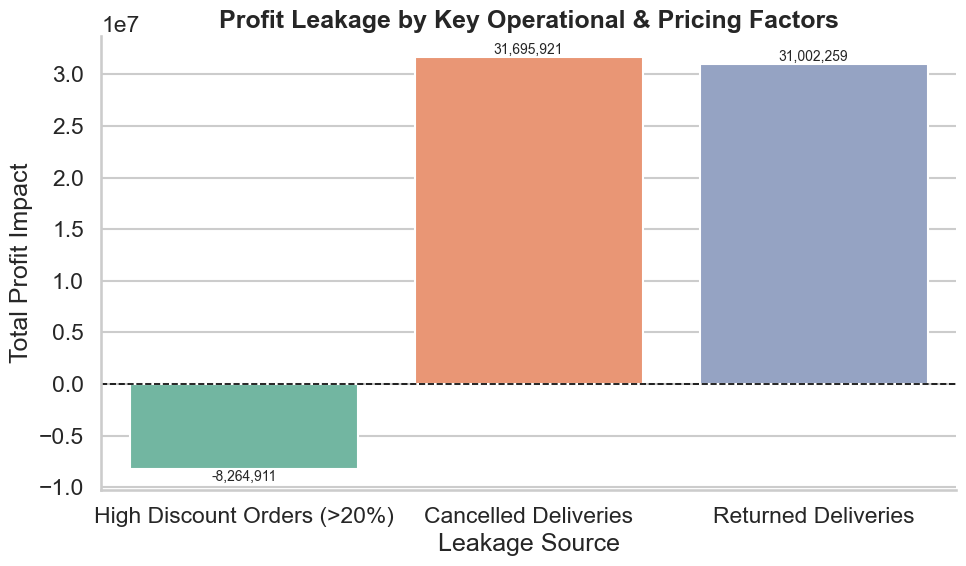

In [101]:
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=leakage_summary,
    x="Leakage Source",
    y="Total Profit Impact",
    palette="Set2"
)

plt.title("Profit Leakage by Key Operational & Pricing Factors", weight="bold")
plt.xlabel("Leakage Source")
plt.ylabel("Total Profit Impact")

# Zero reference line
plt.axhline(0, linestyle="--", linewidth=1.2, color="black")

# Value labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():,.0f}",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha="center",
        va="bottom" if p.get_height() >= 0 else "top",
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()